In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from scipy.stats import norm
plt.style.use('seaborn-whitegrid')

In [2]:
Gaussian = namedtuple('Gaussian', ['mean', 'var'])
Gaussian.sample = lambda self, n: np.random.normal(self.mean, self.var, n)

def product_gaussians(self, other_g):
    m1, m2 = self.mean, other_g.mean
    v1, v2 = self.var, other_g.var
    v1_sqr, v2_sqr = v1**2, v2**2
    mean = (v1_sqr*m2 + v2_sqr*m1) / (v1_sqr + v2_sqr)
    var = (v1_sqr*v2_sqr) / (v1_sqr + v2_sqr)
    return Gaussian(mean=mean, var=var)

def add_gaussians(self, other_g):
    mean = self.mean + other_g.mean
    var = self.var + other_g.var
    return Gaussian(mean=mean, var=var)

def plot_gaussian(self):
    #title = '$\mathcal{N}'+'({0},{1})'.format(self.mean, self.var)+'$'
    #x = np.arange(-self.var*5, self.var*5, .01)
    #y = norm(loc=self.mean, scale=self.var).pdf(x)
    x, y, title = self.pdf()
    plt.plot(x, y)
    plt.title(title)
    plt.show()

def pdf_gaussian(self):
    title = '$\mathcal{N}'+'({0:1.2f},{1:1.2f})'.format(self.mean, self.var)+'$'
    x = np.arange(-self.var*5, self.var*5, .01)
    y = norm(loc=self.mean, scale=self.var).pdf(x)
    return x, y, title

Gaussian.__mul__ = product_gaussians
Gaussian.__add__ = add_gaussians
Gaussian.plot = plot_gaussian
Gaussian.pdf = pdf_gaussian

In [3]:
def gaussian_comparing(gs):
    legend = []
    for g in gs:
        legend.append('$\mathcal{N}'+'({0:1.2f},{1:1.2f})'.format(g.mean, g.var)+'$')
        x = np.arange(-g.var*5, g.var*5, .01)
        y = norm(loc=g.mean, scale=g.var).pdf(x)
        plt.plot(x, y)
    plt.legend(legend)
    plt.show()

In [4]:
g1 = Gaussian(0.0, 1.5)
g2 = Gaussian(1.5, 1.2)
g3 = Gaussian(0.0, 5.0)
g4 = Gaussian(-3.0, 5.0)

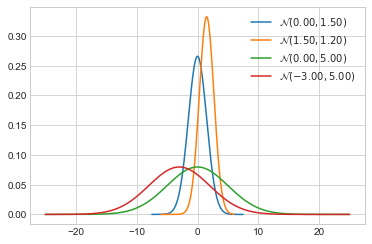

In [5]:
gaussian_comparing([g1, g2, g3, g4])

In [6]:
g1p2 = g1 + g2
g1m2 = g1*g2

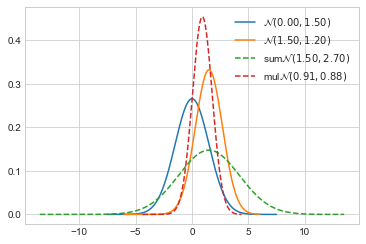

In [7]:
#gaussian_comparing([g1, g2, g1p2, g1m2])
g1_pdf = g1.pdf()
g2_pdf = g2.pdf()
g1p2_pdf = g1p2.pdf()
g1m2_pdf = g1m2.pdf()

plt.plot(g1_pdf[0], g1_pdf[1])
plt.plot(g2_pdf[0], g2_pdf[1])
plt.plot(g1p2_pdf[0], g1p2_pdf[1], '--')
plt.plot(g1m2_pdf[0], g1m2_pdf[1], '--')
plt.legend([g1_pdf[2], g2_pdf[2], 'sum'+g1p2_pdf[2], 'mul'+g1m2_pdf[2]])